# Exercices on Satellite Altimetry Data

Léna Tolu, Fabien Léger, Florence Birol, Fernando Niño

**LEGOS/CTOH**


# Access to variables

We first import some libraries :
datetime will allow us to better manipulate the time variables, matplotlib is used for the plots and cartopy for the maps. Numpy and pandas allow to manipulate data in general, while netCDF4 is designed for the treatment of netcdf files in particular. This notebook works with the following versions :
python 3.9, shapely 2.0.1, Cartopy 0.21.1, matplotlib 3.7.2

In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import pandas as pd

import cartopy.crs as ccrs                                                                                                        
import cartopy.feature as cpf
import warnings
warnings.filterwarnings("ignore")

%matplotlib notebook

We use Dataset to open and read the netcdf file. The data are classed by tracks. Here, we will work on track 1.

In [3]:
filename = 'dt_coastal_j3_phy_20hz_t001.nc'
f = Dataset(filename, 'r')

We can print the variables contained in the file :

In [4]:
for var in f.variables.keys():
    print(var)

latitude_theoretical
longitude_theoretical
latitude
longitude
cycle
time
sea_level_anomaly
distance_from_theoretical
dac
ib_lf
internal_tide
ocean_tide
load_tide
validation_flag
mdt
swh
wind_speed
inter_mission_bias
distance_from_coast


To get attributs of the variable such as units, scale factor or offset, we can do :

In [5]:
f.variables['sea_level_anomaly']

<class 'netCDF4._netCDF4.Variable'>
float32 sea_level_anomaly(nbpoints, nbcycles)
    _FillValue: 9.96921e+36
    long_name: Sea level anomaly with dac, ocean_tide, load_tide, internal_tide correction applied
    standard_name: sea_surface_height_above_sea_level
    units: m
    comment: The sea level anomaly is the sea surface height above mean sea surface height (MSS); It is computed with the following formula: sea_level_anomaly = Orbit -Range - int inter_mission_bias - dac - ocean_tide - load_tide - internal_tide - Solid_earth_tide - Pole_tide - Ionosphere - Dry_troposphre - Wet_troposphere - SSB - MSS. Part of the corrections applied are given in the following variables : inter_mission_biais, ocean_tide, load_tide, internal_tide, dac. See the product user manual for details
    quality_flag: validation_flag
    add_offset: 0.0
    scale_factor: 1.0
unlimited dimensions: 
current shape = (21036, 199)
filling on

We can then use these attributs by doing this :

In [6]:
sla_units = f.variables['sea_level_anomaly'].units
sla_units

'm'

In [7]:
lat_units = f.variables['latitude_theoretical'].units
lat_units

'degrees_north'

The variable is in a masked array form (the mask corresponds to the presence of fill values) :

In [8]:
f.variables['sea_level_anomaly'][:]

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, 0.09000000357627869, 0.023000000044703484, ..., --, --, --],
        [--, 0.026000000536441803, 0.20499999821186066, ..., --,
         -0.3140000104904175, --],
        ...,
        [--, --, 6.480000019073486, ..., --, 4.826000213623047, --],
        [--, 12.888999938964844, 7.61899995803833, ..., --,
         5.783999919891357, --],
        [--, 10.314000129699707, 8.836000442504883, ..., --,
         5.98199987411499, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True, False,  True],
        ...,
        [ True,  True, False, ...,  True, False,  True],
        [ True, False, False, ...,  True, False,  True],
        [ True, False, False, ...,  True, False,  True]],
  fill_value=9.969209968386869e+36)

To access the variable and replace the fill values by NaN, we can do :

In [9]:
sla_raw = np.ma.filled(f.variables['sea_level_anomaly'][:], np.nan)
sla_raw

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,  0.09      ,  0.023     , ...,         nan,
                nan,         nan],
       [        nan,  0.026     ,  0.205     , ...,         nan,
        -0.31400001,         nan],
       ...,
       [        nan,         nan,  6.48000002, ...,         nan,
         4.82600021,         nan],
       [        nan, 12.88899994,  7.61899996, ...,         nan,
         5.78399992,         nan],
       [        nan, 10.31400013,  8.83600044, ...,         nan,
         5.98199987,         nan]])

The scale factor and the offset are applied automatically when doing this. We can thus import the latitude and longitude, and visualize the track on the map :

In [10]:
lat = np.ma.filled(f.variables['latitude_theoretical'][:], np.nan)
lat

array([       nan, -66.147567, -66.147556, ...,  66.140121,  66.140186,
        66.140249])

In [11]:
lon = np.ma.filled(f.variables['longitude_theoretical'][:], np.nan)
lon

array([  12.516352,   17.087164,   17.094015, ..., -178.522561,
       -178.515711, -178.50886 ])

<IPython.core.display.Javascript object>


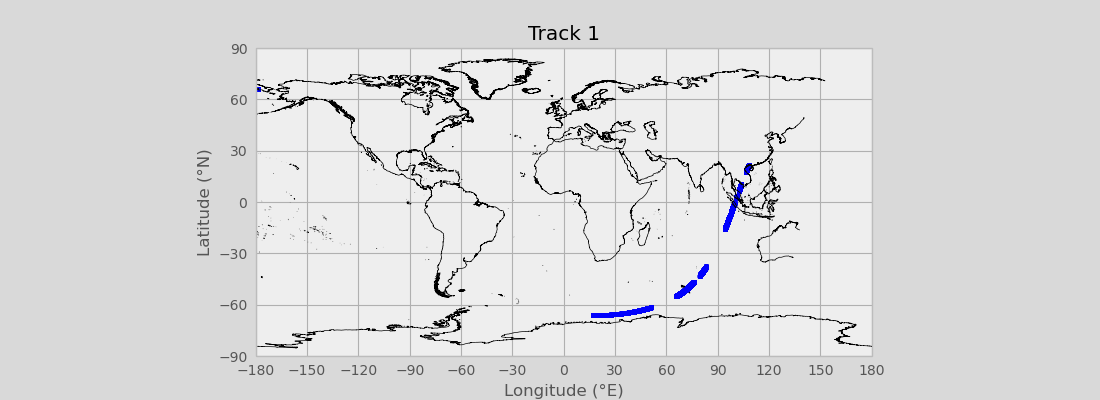

Text(0.5, 1.0, 'Track 1')

In [12]:
projection_crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(11,4))
ax = plt.axes(projection=projection_crs)
ax.coastlines(resolution='10m')
plt.scatter(lon, lat, c= 'b', marker='.', alpha=0.7)
ax.set_xticks(range(-180, 181, 30), crs=projection_crs)
ax.set_yticks(range(-90, 91, 30), crs=projection_crs)
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Latitude (°N)')
plt.title('Track 1')


There is a validation flag :

In [87]:
f.variables['validation_flag']

<class 'netCDF4._netCDF4.Variable'>
int16 validation_flag(nbpoints, nbcycles)
    _FillValue: -32767
    long_name: Validation flag
    untis: 1
    meaning: 0 = valid measurement; 1 = invalid measurement
    values: 0, 1
unlimited dimensions: 
current shape = (21036, 199)
filling on

In [90]:
flag = f.variables['validation_flag'][:]
flag

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [--, 1, 1, ..., 1, 1, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False,  True]],
  fill_value=-32767,
  dtype=int16)

To better visualize the SLA and the validation flag, we can put it in DataFrame. The columns correspond to the cycles.

In [91]:
df_slaraw = pd.DataFrame(sla_raw)
df_slaraw

0       1      2       3       4       5       6          7      8    \
0      NaN     NaN    NaN     NaN     NaN     NaN     NaN        NaN    NaN   
1      NaN   0.090  0.023   0.060   0.142  -0.090     NaN   0.138000 -0.033   
2      NaN   0.026  0.205  -0.033   0.189   0.192     NaN   0.163000 -0.111   
3      NaN   0.027  0.081   0.077   0.035   0.048   0.035   0.054000 -0.028   
4      NaN   0.068  0.126   0.102   0.055  -0.101   0.143   0.043000 -0.087   
...    ...     ...    ...     ...     ...     ...     ...        ...    ...   
21031  NaN   6.184    NaN   5.622   7.127   5.590   5.103 -24.905001    NaN   
21032  NaN   4.977  4.545   4.667   5.452   9.771  -2.804  32.222000  0.926   
21033  NaN     NaN  6.480   9.332   7.194  11.338  12.356   3.564000  2.006   
21034  NaN  12.889  7.619  12.073   8.925  11.667   8.091  11.469000  1.948   
21035  NaN  10.314  8.836  13.663  10.985   9.567   9.978  10.425000    NaN   

         9    ...    189    190        191        192     193  194   195  196  \
0        NaN  ...    NaN    NaN        NaN        NaN     NaN  NaN   NaN  NaN   
1     -0.079  ...  0.100  0.167   0.078000   0.056000     NaN  NaN  0.08  NaN   
2      0.059  ...  0.023  0.054   0.012000  -0.103000     NaN  NaN   NaN  NaN   
3     -0.045  ...  0.025  0.132   0.168000  -0.036000     NaN  NaN  0.04  NaN   
4      0.124  ...  0.022  0.074   0.131000  -0.159000     NaN  NaN   NaN  NaN   
...      ...  ...    ...    ...        ...        ...     ...  ...   ...  ...   
21031    NaN  ...  5.589  5.962 -30.551001   5.021000   7.841  NaN   NaN  NaN   
21032    NaN  ...  5.986  6.144   8.208000   7.195000   8.489  NaN   NaN  NaN   
21033    NaN  ...  5.150  6.978  11.009000 -24.377001  11.222  NaN   NaN  NaN   
21034    NaN  ...  5.097  7.528   8.091000   8.137000   7.951  NaN   NaN  NaN   
21035    NaN  ...  6.499  7.946        NaN   8.919000   8.494  NaN   NaN  NaN   

         197  198  
0        NaN  NaN  
1        NaN  NaN  
2     -0.314  NaN  
3        NaN  NaN  
4     -0.305  NaN  
...      ...  ...  
21031  3.263  NaN  
21032  4.215  NaN  
21033  4.826  NaN  
21034  5.784  NaN  
21035  5.982  NaN  

[21036 rows x 199 columns]

In [92]:
df_flag = pd.DataFrame(flag.data)
df_flag

0      1      2      3      4      5      6      7      8      9    \
0     -32767 -32767 -32767 -32767 -32767 -32767 -32767 -32767 -32767 -32767   
1          0      0      0      0      0      0 -32767      0      0      0   
2          0      0      0      0      0      0 -32767      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
21031      1      1      1      1      1      1      1      1      1      1   
21032      1      1      1      1      1      1      1      1      1      1   
21033      1      1      1      1      1      1      1      1      1      1   
21034      1      1      1      1      1      1      1      1      1      1   
21035 -32767      1      1      1      1      1      1      1 -32767      1   

       ...    189    190    191    192    193    194    195    196    197  \
0      ... -32767 -32767 -32767 -32767 -32767 -32767 -32767 -32767 -32767   
1      ...      0      0      0      0      1      1      1      1      1   
2      ...      0      0      0      0      1      1      1      1      1   
3      ...      0      0      0      0      1      1      1      1      1   
4      ...      0      0      0      0      1      1      1      1      1   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
21031  ...      1      1      1      1      1      1      1      1      1   
21032  ...      1      1      1      1      1      1      1      1      1   
21033  ...      1      1      1      1      1      1      1      1      1   
21034  ...      1      1      1      1      1      1      1      1      1   
21035  ...      1      1      1      1      1 -32767      1      1      1   

         198  
0     -32767  
1          1  
2          1  
3          1  
4          1  
...      ...  
21031      1  
21032      1  
21033      1  
21034      1  
21035 -32767  

[21036 rows x 199 columns]

We create a boolean dataframe (acts like a mask) based on the validation flag. Here, the '0' (valid values) become the 'True'.

In [93]:
df_flag_bool = df_flag == 0
df_flag_bool

0      1      2      3      4      5      6      7      8      9    \
0      False  False  False  False  False  False  False  False  False  False   
1       True   True   True   True   True   True  False   True   True   True   
2       True   True   True   True   True   True  False   True   True   True   
3       True   True   True   True   True   True   True   True   True   True   
4       True   True   True   True   True   True   True   True   True   True   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
21031  False  False  False  False  False  False  False  False  False  False   
21032  False  False  False  False  False  False  False  False  False  False   
21033  False  False  False  False  False  False  False  False  False  False   
21034  False  False  False  False  False  False  False  False  False  False   
21035  False  False  False  False  False  False  False  False  False  False   

       ...    189    190    191    192    193    194    195    196    197  \
0      ...  False  False  False  False  False  False  False  False  False   
1      ...   True   True   True   True  False  False  False  False  False   
2      ...   True   True   True   True  False  False  False  False  False   
3      ...   True   True   True   True  False  False  False  False  False   
4      ...   True   True   True   True  False  False  False  False  False   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
21031  ...  False  False  False  False  False  False  False  False  False   
21032  ...  False  False  False  False  False  False  False  False  False   
21033  ...  False  False  False  False  False  False  False  False  False   
21034  ...  False  False  False  False  False  False  False  False  False   
21035  ...  False  False  False  False  False  False  False  False  False   

         198  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
21031  False  
21032  False  
21033  False  
21034  False  
21035  False  

[21036 rows x 199 columns]

To apply the validation flag on the SLA, we can do :

In [94]:
df_slaedit = df_slaraw[df_flag_bool]
df_slaedit

0      1      2      3      4      5      6      7      8      9    \
0      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1      NaN  0.090  0.023  0.060  0.142 -0.090    NaN  0.138 -0.033 -0.079   
2      NaN  0.026  0.205 -0.033  0.189  0.192    NaN  0.163 -0.111  0.059   
3      NaN  0.027  0.081  0.077  0.035  0.048  0.035  0.054 -0.028 -0.045   
4      NaN  0.068  0.126  0.102  0.055 -0.101  0.143  0.043 -0.087  0.124   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
21031  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
21032  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
21033  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
21034  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
21035  NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ...    189    190    191    192  193  194  195  196  197  198  
0      ...    NaN    NaN    NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1      ...  0.100  0.167  0.078  0.056  NaN  NaN  NaN  NaN  NaN  NaN  
2      ...  0.023  0.054  0.012 -0.103  NaN  NaN  NaN  NaN  NaN  NaN  
3      ...  0.025  0.132  0.168 -0.036  NaN  NaN  NaN  NaN  NaN  NaN  
4      ...  0.022  0.074  0.131 -0.159  NaN  NaN  NaN  NaN  NaN  NaN  
...    ...    ...    ...    ...    ...  ...  ...  ...  ...  ...  ...  
21031  ...    NaN    NaN    NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
21032  ...    NaN    NaN    NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
21033  ...    NaN    NaN    NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
21034  ...    NaN    NaN    NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
21035  ...    NaN    NaN    NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[21036 rows x 199 columns]

If we want to plot the SLA versus the latitude for cycle 13, we can do :

<IPython.core.display.Javascript object>


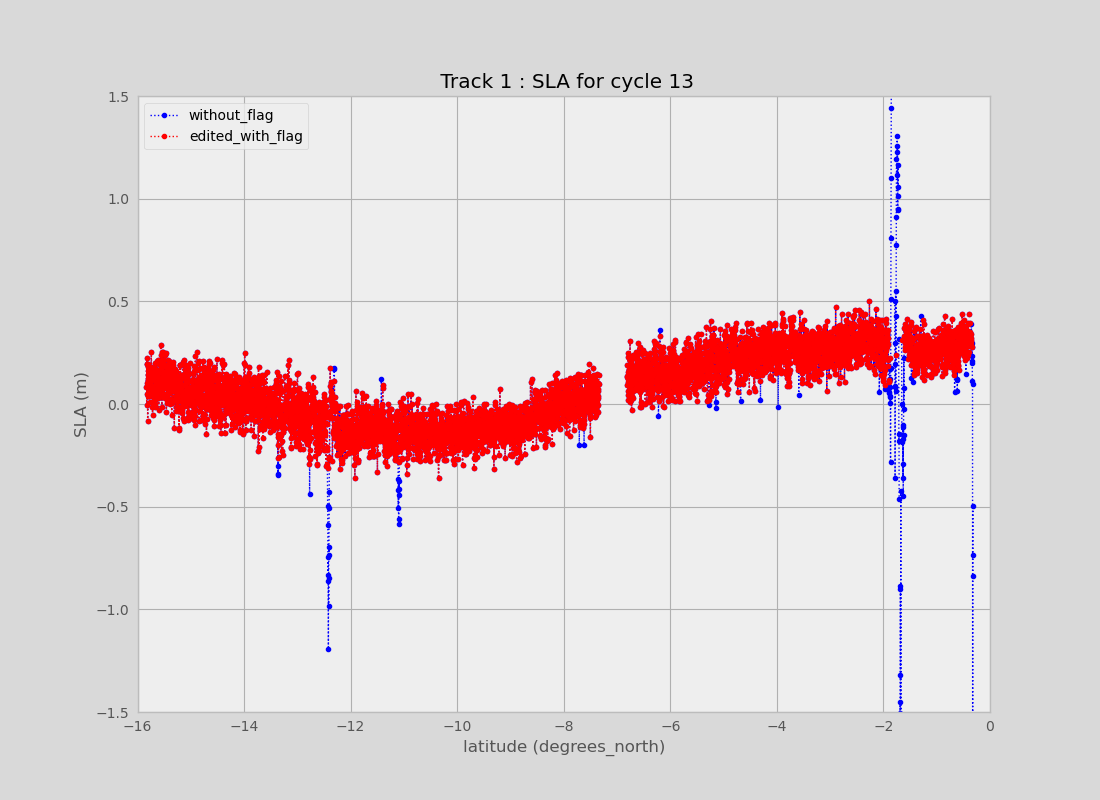

In [95]:
plt.figure()
plt.plot(lat, df_slaraw[13],'b:.', label='without_flag')
plt.plot(lat, df_slaedit[13],'r:.', label='edited_with_flag')
plt.xlabel('latitude (' + lat_units + ')')
plt.ylabel('SLA (' + sla_units + ')')
plt.xlim([-16, 0])
plt.ylim([-1.5, 1.5])
plt.title(' Track 1 : SLA for cycle 13')
plt.legend()
plt.show()

We can see that there are some outliers in the raw data, that are eliminated in the edited SLA.

# Time manipulation 

In [96]:
time = np.ma.filled(f.variables['time'][:], np.nan)
df_time = pd.DataFrame(time)
df_time

0             1             2             3             4    \
0      24153.436641  24163.352286  24173.267946  24183.183604  24193.099259   
1      24153.436641  24163.352287  24173.267947  24183.183605  24193.099259   
2      24153.436642  24163.352287  24173.267947  24183.183606  24193.099260   
3      24153.436643  24163.352288  24173.267948  24183.183607  24193.099260   
4      24153.436643  24163.352289  24173.267949  24183.183607  24193.099261   
...             ...           ...           ...           ...           ...   
21031  24153.475545  24163.391191  24173.306850  24183.222509  24193.138163   
21032  24153.475547  24163.391191  24173.306851  24183.222510  24193.138164   
21033  24153.475547  24163.391192  24173.306852  24183.222510  24193.138164   
21034  24153.475548  24163.391192  24173.306852  24183.222511  24193.138165   
21035  24153.475548  24163.391193  24173.306853  24183.222511  24193.138165   

                5             6             7             8             9    \
0      24203.014905  24212.930544  24222.846178  24232.761811  24242.677442   
1      24203.014906  24212.930545  24222.846179  24232.761812  24242.677442   
2      24203.014907  24212.930545  24222.846179  24232.761812  24242.677443   
3      24203.014907  24212.930545  24222.846180  24232.761813  24242.677444   
4      24203.014908  24212.930545  24222.846181  24232.761814  24242.677444   
...             ...           ...           ...           ...           ...   
21031  24203.053810  24212.969448  24222.885084  24232.800717  24242.716348   
21032  24203.053811  24212.969449  24222.885084  24232.800718  24242.716349   
21033  24203.053812  24212.969450  24222.885085  24232.800718  24242.716349   
21034  24203.053812  24212.969450  24222.885086  24232.800720  24242.716350   
21035  24203.053813  24212.969451  24222.885086  24232.800717  24242.716351   

       ...           189           190           191           192  \
0      ...  26027.493186  26037.408827  26047.324468  26057.240109   
1      ...  26027.493186  26037.408827  26047.324468  26057.240110   
2      ...  26027.493187  26037.408828  26047.324469  26057.240110   
3      ...  26027.493188  26037.408828  26047.324469  26057.240111   
4      ...  26027.493189  26037.408829  26047.324470  26057.240111   
...    ...           ...           ...           ...           ...   
21031  ...  26027.532090  26037.447730  26047.363371  26057.279013   
21032  ...  26027.532091  26037.447731  26047.363372  26057.279013   
21033  ...  26027.532091  26037.447732  26047.363373  26057.279014   
21034  ...  26027.532092  26037.447732  26047.363373  26057.279015   
21035  ...  26027.532092  26037.447733  26047.363374  26057.279015   

                193           194           195           196           197  \
0      26067.155760  26077.071408  26086.987053  26096.902695  26106.818335   
1      26067.155760  26077.071409  26086.987054  26096.902695  26106.818335   
2      26067.155761  26077.071409  26086.987054  26096.902696  26106.818336   
3      26067.155762  26077.071410  26086.987055  26096.902697  26106.818337   
4      26067.155762  26077.071410  26086.987055  26096.902697  26106.818337   
...             ...           ...           ...           ...           ...   
21031  26067.194664  26077.110312  26087.025958  26096.941600  26106.857241   
21032  26067.194664  26077.110313  26087.025958  26096.941601  26106.857241   
21033  26067.194665  26077.110314  26087.025959  26096.941602  26106.857242   
21034  26067.194666  26077.110315  26087.025960  26096.941602  26106.857243   
21035  26067.194666  26077.110315  26087.025960  26096.941603  26106.857243   

                198  
0      26116.733972  
1      26116.733973  
2      26116.733974  
3      26116.733975  
4      26116.733975  
...             ...  
21031  26116.772879  
21032  26116.772880  
21033  26116.772881  
21034  26116.772881  
21035  26116.772882  

[21036 rows x 199 columns]

In [97]:
f.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(nbpoints, nbcycles)
    _FillValue: 9.969209968386869e+36
    standard_name: time
    long_name: Time of measurement in UTC
    units: days since 1950-01-01T00:00:00+00:00
    calendar: gregorian
unlimited dimensions: 
current shape = (21036, 199)
filling on

The time values are not in the usual datetime format (they correspond to the days since 01/01/1950). To convert them into datetime, we can do :

In [98]:
tref = datetime.datetime(1950,1,1)
df_time = df_time.transpose()
for i in range(len(time)):
    df_time[i] = np.array([tref + datetime.timedelta(days=t) for t in time[i]])
df_time = df_time.transpose()
df_time

0                          1    \
0     2016-02-17 10:28:45.770699 2016-02-27 08:27:17.523518   
1     2016-02-17 10:28:45.821635 2016-02-27 08:27:17.574454   
2     2016-02-17 10:28:45.872571 2016-02-27 08:27:17.625390   
3     2016-02-17 10:28:45.923507 2016-02-27 08:27:17.676325   
4     2016-02-17 10:28:45.974442 2016-02-27 08:27:17.727261   
...                          ...                        ...   
21031 2016-02-17 11:24:47.119294 2016-02-27 09:23:18.868228   
21032 2016-02-17 11:24:47.221165 2016-02-27 09:23:18.919163   
21033 2016-02-17 11:24:47.272101 2016-02-27 09:23:18.970099   
21034 2016-02-17 11:24:47.323036 2016-02-27 09:23:19.021034   
21035 2016-02-17 11:24:47.373971 2016-02-27 09:23:19.071970   

                             2                          3    \
0     2016-03-08 06:25:50.558704 2016-03-18 04:24:23.427726   
1     2016-03-08 06:25:50.609639 2016-03-18 04:24:23.478661   
2     2016-03-08 06:25:50.660574 2016-03-18 04:24:23.529596   
3     2016-03-08 06:25:50.711510 2016-03-18 04:24:23.631467   
4     2016-03-08 06:25:50.762445 2016-03-18 04:24:23.682403   
...                          ...                        ...   
21031 2016-03-08 07:21:51.868486 2016-03-18 05:20:24.787952   
21032 2016-03-08 07:21:51.919421 2016-03-18 05:20:24.838887   
21033 2016-03-08 07:21:51.970356 2016-03-18 05:20:24.889823   
21034 2016-03-08 07:21:52.021291 2016-03-18 05:20:24.940758   
21035 2016-03-08 07:21:52.072227 2016-03-18 05:20:24.991695   

                             4                          5    \
0     2016-03-28 02:22:55.951534 2016-04-07 00:21:27.830899   
1     2016-03-28 02:22:56.002470 2016-04-07 00:21:27.881834   
2     2016-03-28 02:22:56.053406 2016-04-07 00:21:27.932769   
3     2016-03-28 02:22:56.104341 2016-04-07 00:21:27.983704   
4     2016-03-28 02:22:56.155277 2016-04-07 00:21:28.034640   
...                          ...                        ...   
21031 2016-03-28 03:18:57.281681 2016-04-07 01:17:29.212948   
21032 2016-03-28 03:18:57.332617 2016-04-07 01:17:29.263884   
21033 2016-03-28 03:18:57.383552 2016-04-07 01:17:29.314819   
21034 2016-03-28 03:18:57.434488 2016-04-07 01:17:29.365755   
21035 2016-03-28 03:18:57.485423 2016-04-07 01:17:29.416690   

                             6                          7    \
0     2016-04-16 22:19:59.039863 2016-04-26 20:18:29.802900   
1     2016-04-16 22:19:59.071292 2016-04-26 20:18:29.853836   
2     2016-04-16 22:19:59.102721 2016-04-26 20:18:29.904772   
3     2016-04-16 22:19:59.071183 2016-04-26 20:18:29.955707   
4     2016-04-16 22:19:59.122118 2016-04-26 20:18:30.006643   
...                          ...                        ...   
21031 2016-04-16 23:16:00.336807 2016-04-26 21:14:31.247525   
21032 2016-04-16 23:16:00.387743 2016-04-26 21:14:31.298460   
21033 2016-04-16 23:16:00.438678 2016-04-26 21:14:31.349396   
21034 2016-04-16 23:16:00.489614 2016-04-26 21:14:31.400331   
21035 2016-04-16 23:16:00.540549 2016-04-26 21:14:31.451267   

                             8                          9    ...  \
0     2016-05-06 18:17:00.494682 2016-05-16 16:15:30.972761  ...   
1     2016-05-06 18:17:00.545617 2016-05-16 16:15:31.023697  ...   
2     2016-05-06 18:17:00.596552 2016-05-16 16:15:31.074633  ...   
3     2016-05-06 18:17:00.647488 2016-05-16 16:15:31.125568  ...   
4     2016-05-06 18:17:00.698423 2016-05-16 16:15:31.176504  ...   
...                          ...                        ...  ...   
21031 2016-05-06 19:13:01.966954 2016-05-16 17:11:32.484323  ...   
21032 2016-05-06 19:13:02.017890 2016-05-16 17:11:32.535258  ...   
21033 2016-05-06 19:13:02.068825 2016-05-16 17:11:32.586194  ...   
21034 2016-05-06 19:13:02.170696 2016-05-16 17:11:32.637129  ...   
21035 2016-05-06 19:13:01.963659 2016-05-16 17:11:32.688065  ...   

                             189                        190  \
0     2021-04-05 11:50:11.246950 2021-04-15 09:48:42.629030   
1     2021-04-05 11:50:11.297885 2021-04-15 09:48:42.67996

We can then plot the time series of SLA at a given point :

<IPython.core.display.Javascript object>


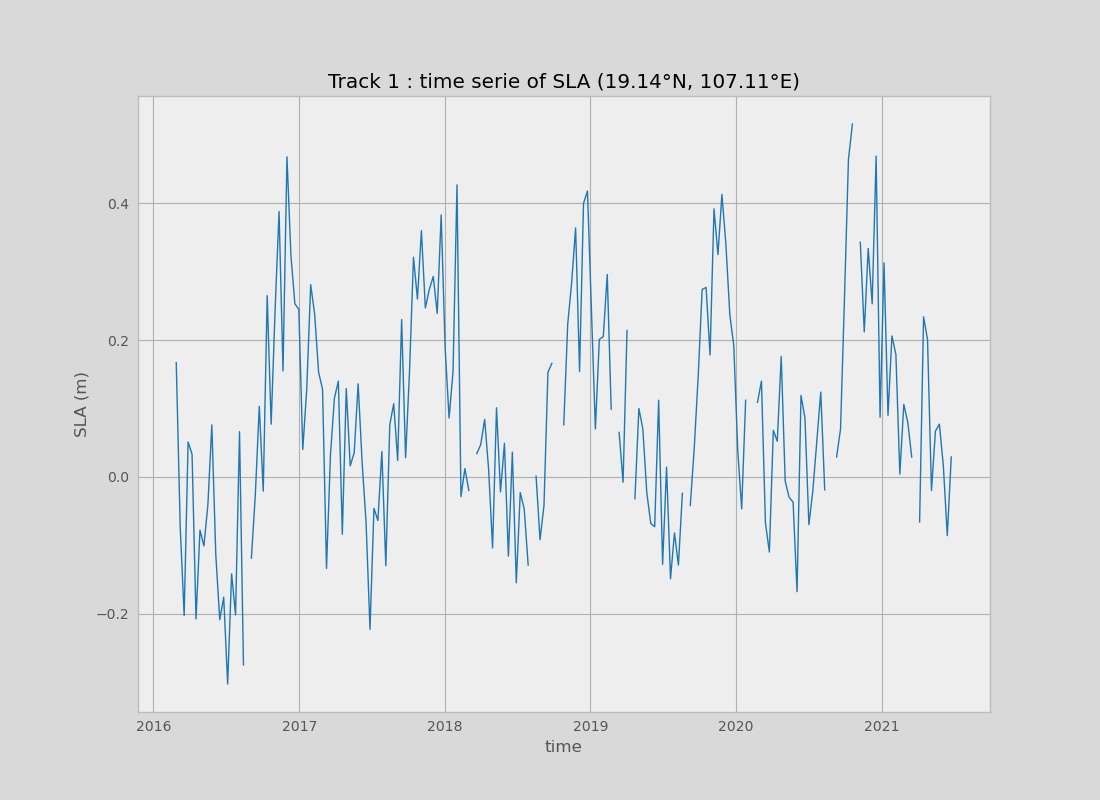

In [99]:
lat_time_serie = np.round(lat[20000], 2)
lon_time_serie = np.round(lon[20000], 2)
plt.figure()
plt.plot(df_time.loc[20000], df_slaedit.loc[20000])
plt.xlabel('time')
plt.ylabel('SLA (' + sla_units + ')')
plt.title('Track 1 : time serie of SLA (' + str(lat_time_serie) + '°N, ' + str(lon_time_serie) + '°E)')
plt.show()

We can also plot Hovmoller diagrams of SLA (latitude vs time, with the SLA in color).
For that, we need to replace the nans in the latitude by an outlier (that will not appear on the plot).

In [100]:
lat = np.nan_to_num(lat, nan=100)
lat

array([100.      , -66.147567, -66.147556, ...,  66.140121,  66.140186,
        66.140249])

<IPython.core.display.Javascript object>


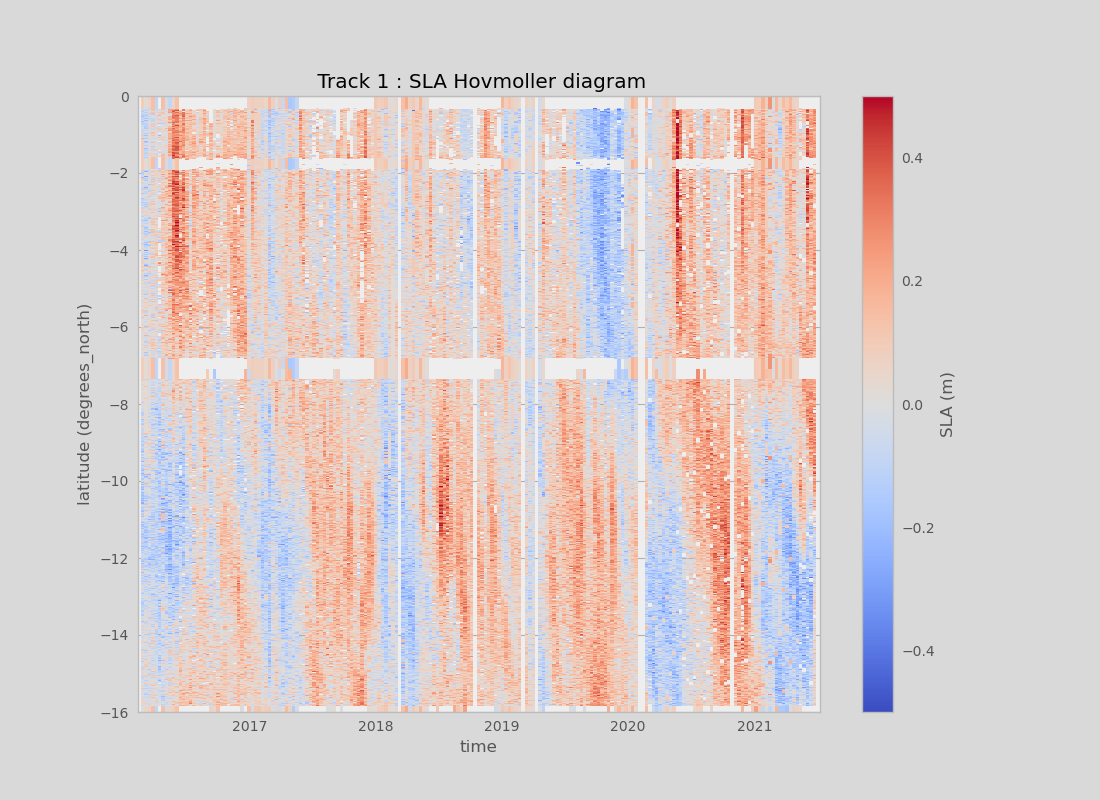

In [101]:
plt.figure()
plt.pcolormesh(df_time.values, lat, df_slaedit.values, vmin=-0.5, vmax=0.5, cmap='coolwarm')
plt.xlabel('time')
plt.ylabel('latitude (' + lat_units + ')')
plt.title(' Track 1 : SLA Hovmoller diagram')
plt.ylim([-16,0])
plt.colorbar(label='SLA (m)')
plt.show()

# Maps

In [102]:
lat = np.ma.filled(f.variables['latitude_theoretical'][:], np.nan)
lon = np.ma.filled(f.variables['longitude_theoretical'][:], np.nan)

In [1]:
6/4

1.5

<IPython.core.display.Javascript object>


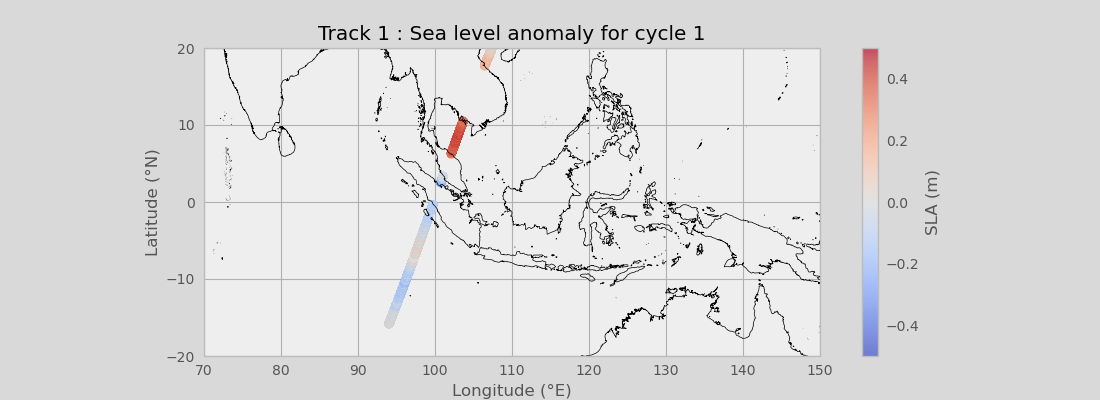

In [103]:
projection_crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(11,4))
ax = plt.axes(projection=projection_crs)
ax.coastlines(resolution='10m')
plt.scatter(lon, lat, c=df_slaedit[1], marker='o', alpha=0.7, vmin=-0.5, vmax=0.5, cmap='coolwarm')
ax.set_xlim([70, 150])
ax.set_ylim([-20, 20])
ax.set_xticks(range(70, 151, 10), crs=projection_crs)
ax.set_yticks(range(-20, 21, 10), crs=projection_crs)
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Latitude (°N)')
ax.set_title('Track 1 : Sea level anomaly for cycle 1')
cb = plt.colorbar()
cb.set_label('SLA (m)')

We can also plot other variables present in the file : 

In [104]:
swh = np.ma.filled(f.variables['swh'][:], np.nan)
df_swhraw = pd.DataFrame(swh)
df_swhedit = df_swhraw[df_flag_bool]
wind = np.ma.filled(f.variables['wind_speed'][:], np.nan)
df_windraw = pd.DataFrame(wind)
df_windedit = df_windraw[df_flag_bool]

<IPython.core.display.Javascript object>


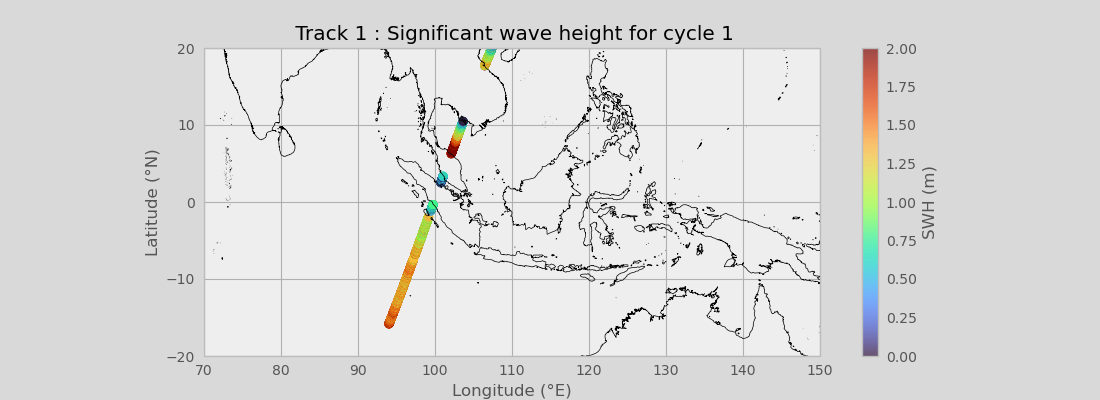

In [105]:
projection_crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(11,4))
ax = plt.axes(projection=projection_crs)
ax.coastlines(resolution='10m')
plt.scatter(lon, lat, c=df_swhedit[1], marker='o', alpha=0.7, vmin=0, vmax=2, cmap='turbo')
ax.set_xlim([70, 150])
ax.set_ylim([-20, 20])
ax.set_xticks(range(70, 151, 10), crs=projection_crs)
ax.set_yticks(range(-20, 21, 10), crs=projection_crs)
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Latitude (°N)')
ax.set_title(' Track 1 : Significant wave height for cycle 1')
cb = plt.colorbar()
cb.set_label('SWH (m)')

<IPython.core.display.Javascript object>


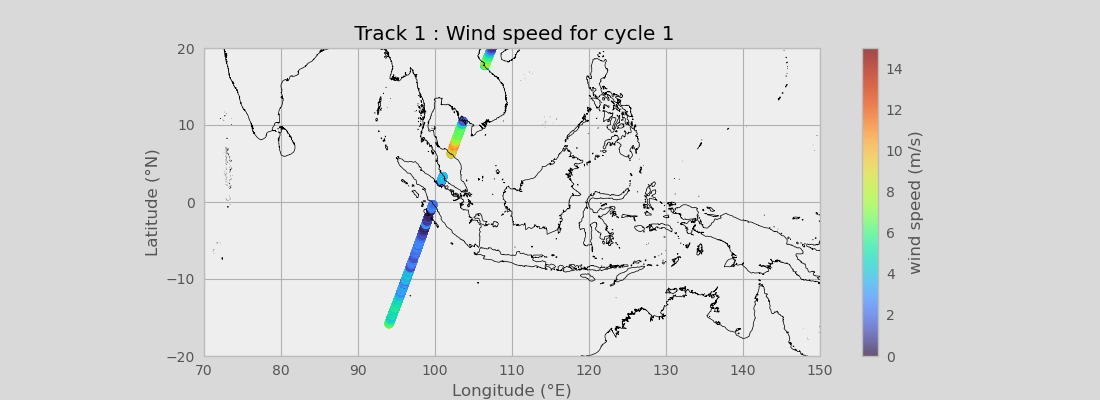

In [106]:
projection_crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(11,4))
ax = plt.axes(projection=projection_crs)
ax.coastlines(resolution='10m')
plt.scatter(lon, lat, c=df_windedit[1], marker='o', alpha=0.7, vmin=0, vmax=15, cmap='turbo')
ax.set_xlim([70, 150])
ax.set_ylim([-20, 20])
ax.set_xticks(range(70, 151, 10), crs=projection_crs)
ax.set_yticks(range(-20, 21, 10), crs=projection_crs)
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Latitude (°N)')
ax.set_title(' Track 1 : Wind speed for cycle 1')
cb = plt.colorbar()
cb.set_label('wind speed (m/s)')